Carga de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos optimizados
ruta_datos = "../data/datos_optimizados.csv"
datos = pd.read_csv(ruta_datos)

# Vista inicial de los datos
print("Vista inicial de los datos:")
print(datos.head())


Vista inicial de los datos:
       Fecha y Hora    Tipo de Muestra  Tiempo de Procesamiento (min)  \
0  2024-11-25 08:06  Secreción vaginal                              5   
1  2025-02-09 16:10             Sangre                              5   
2  2024-07-21 19:19              Orina                              5   
3  2024-07-02 02:47      Materia fecal                              6   
4  2024-06-04 21:57             Sangre                              6   

   Personal Disponible  Personal Asignado  
0                    5                  1  
1                    1                  1  
2                    3                  1  
3                    4                  1  
4                    2                  1  


Gráficos: Distribución de tiempos de procesamiento

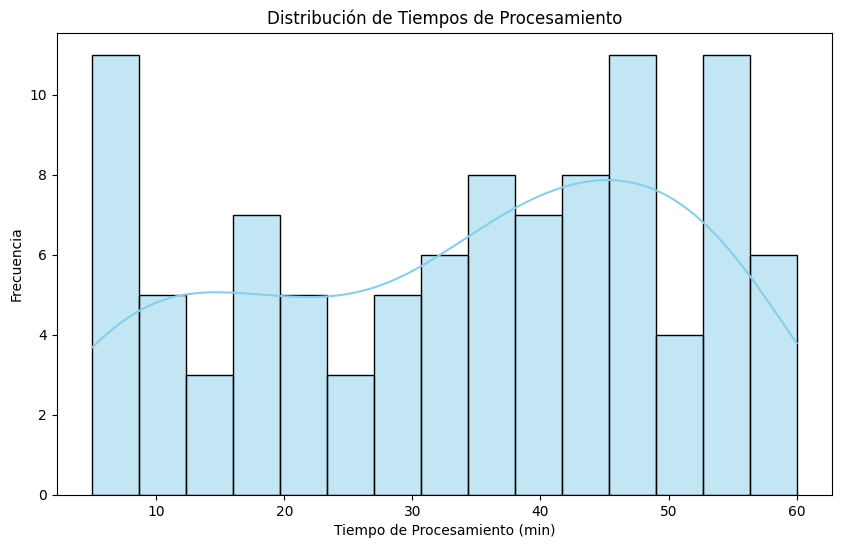

In [2]:
# Distribución de los tiempos de procesamiento
plt.figure(figsize=(10, 6))
sns.histplot(datos["Tiempo de Procesamiento (min)"], bins=15, kde=True, color="skyblue")
plt.title("Distribución de Tiempos de Procesamiento")
plt.xlabel("Tiempo de Procesamiento (min)")
plt.ylabel("Frecuencia")
plt.show()


Gráficos: Uso del personal disponible

/tmp/ipykernel_34086/2063089962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Personal Disponible", data=datos, palette="pastel")


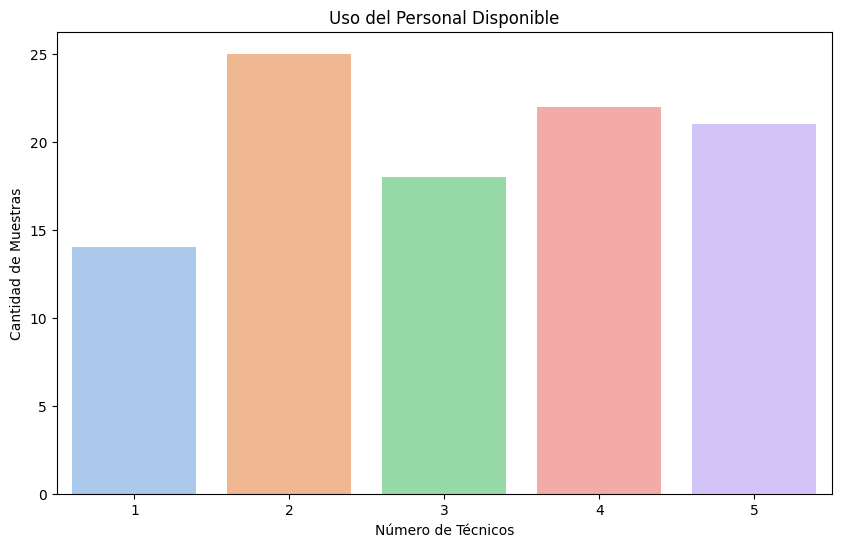

In [3]:
# Uso del personal disponible
plt.figure(figsize=(10, 6))
sns.countplot(x="Personal Disponible", data=datos, palette="pastel")
plt.title("Uso del Personal Disponible")
plt.xlabel("Número de Técnicos")
plt.ylabel("Cantidad de Muestras")
plt.show()


Carga de trabajo por hora

/tmp/ipykernel_34086/2858022012.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Hora", data=datos, palette="viridis")


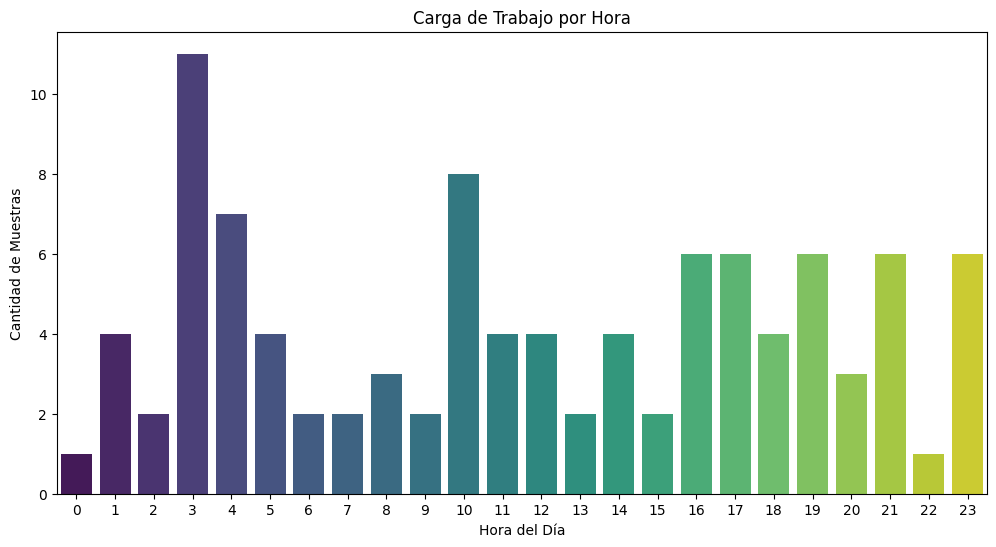

In [4]:
# Convertir la columna Fecha y Hora a tipo datetime
datos["Fecha y Hora"] = pd.to_datetime(datos["Fecha y Hora"])

# Agregar columna de horas
datos["Hora"] = datos["Fecha y Hora"].dt.hour

# Gráfico de carga de trabajo por hora
plt.figure(figsize=(12, 6))
sns.countplot(x="Hora", data=datos, palette="viridis")
plt.title("Carga de Trabajo por Hora")
plt.xlabel("Hora del Día")
plt.ylabel("Cantidad de Muestras")
plt.show()


Gráficos: Tiempos promedio de procesamiento por tipo de muestra

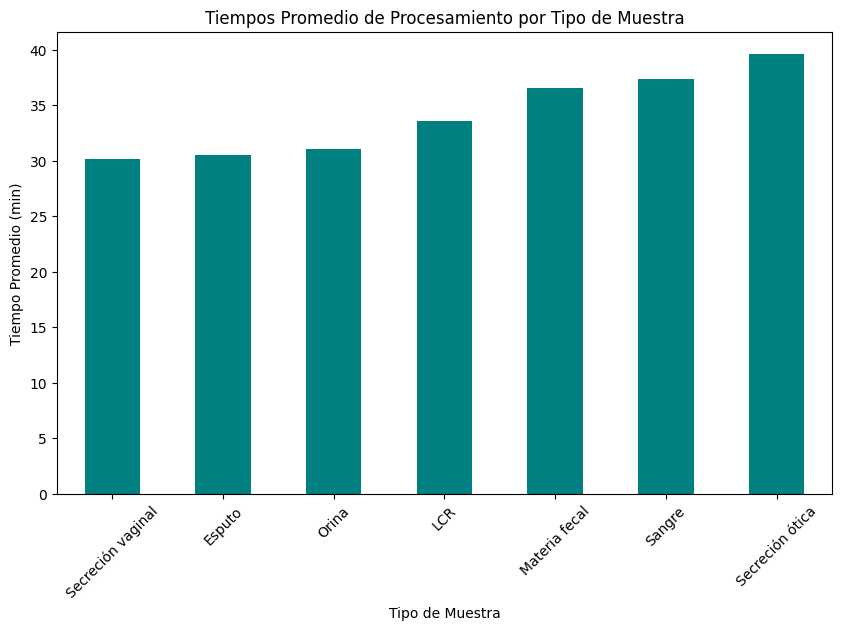

In [5]:
# Tiempos promedio de procesamiento por tipo de muestra
plt.figure(figsize=(10, 6))
promedios = datos.groupby("Tipo de Muestra")["Tiempo de Procesamiento (min)"].mean().sort_values()
promedios.plot(kind="bar", color="teal")
plt.title("Tiempos Promedio de Procesamiento por Tipo de Muestra")
plt.xlabel("Tipo de Muestra")
plt.ylabel("Tiempo Promedio (min)")
plt.xticks(rotation=45)
plt.show()


Mapa de calor: Carga de trabajo por hora

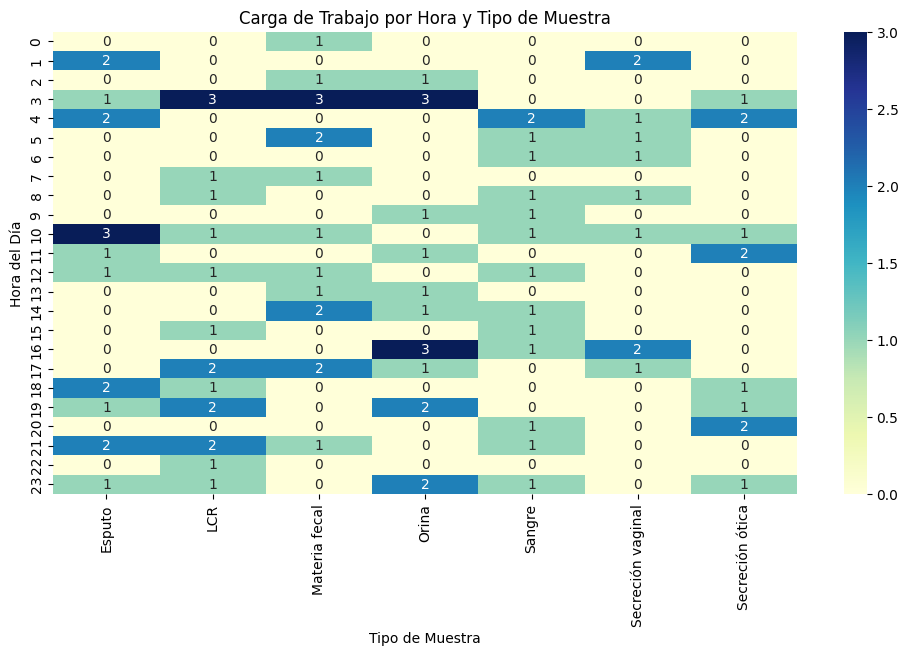

In [6]:
# Generar mapa de calor de carga por hora y tipo de muestra
heatmap_data = datos.groupby(["Hora", "Tipo de Muestra"]).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Carga de Trabajo por Hora y Tipo de Muestra")
plt.xlabel("Tipo de Muestra")
plt.ylabel("Hora del Día")
plt.show()


Gráficos: Comparación entre el personal disponible y asignado

<Figure size 1000x600 with 0 Axes>

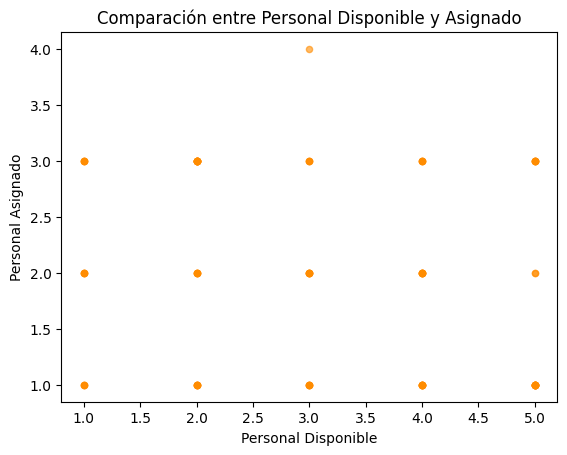

In [7]:
# Comparación entre personal disponible y asignado
plt.figure(figsize=(10, 6))
datos.plot(kind="scatter", x="Personal Disponible", y="Personal Asignado", alpha=0.6, color="darkorange")
plt.title("Comparación entre Personal Disponible y Asignado")
plt.xlabel("Personal Disponible")
plt.ylabel("Personal Asignado")
plt.show()
